In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Set up the NetworkX graph
G = nx.Graph()

In [2]:
# read edge list
edges = pd.read_pickle('data/subreddit_edges.pkl')

In [3]:
# Add nodes from the dataframe
unique_nodes = edges['subreddit'].unique()
for sub in unique_nodes:
    G.add_node(sub, type='subreddit')
    # get the users that post to this subreddit
    users = set()
    for user in edges[edges['subreddit'] == sub]['name']:
        users.add(user)
    # add edges between subreddits that share users
    for sub2 in edges[edges['name'].isin(users)]['subreddit'].unique():
        if sub != sub2:
            G.add_edge(sub, sub2)
            # edge weight
            G[sub][sub2]['weight'] = len(users)




graph has 35k nodes and 3.6M edges

In [4]:
# find the number of users per subreddit
sub_counts = edges.groupby('subreddit').count()

In [ ]:
# assign edge weights
# for edge in G.edges:
#     # get the number of users that post to both subreddits
#     users = set()
#     for user in edges[edges['subreddit'] == edge[0]]['name']:
#         users.add(user)
#     for user in edges[edges['subreddit'] == edge[1]]['name']:
#         users.add(user)
#     # add edge weight
#     G.edges[edge]['weight'] = len(users)

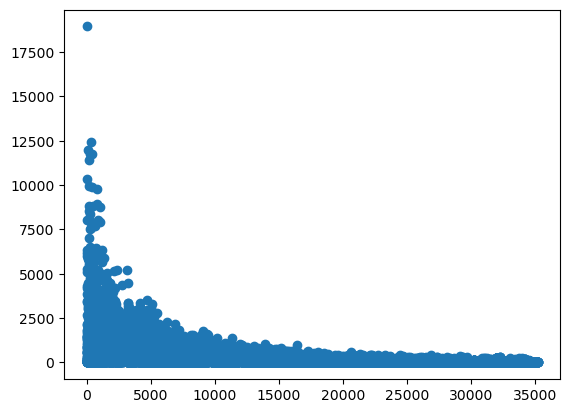

In [5]:
# create scatter plot of degree distribution
degrees = [G.degree(n) for n in G.nodes()]
plt.scatter(range(len(degrees)), degrees)
plt.show()

In [6]:
print(nx.info(G))
print('Density:', nx.density(G))

# Save the graph to a file
nx.write_gexf(G, 'data/reddit_network.gexf')

/var/folders/jj/bt0ykz9n5_16z2gvbybl0tbc0000gn/T/ipykernel_20051/589662533.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


Graph with 35167 nodes and 3659203 edges
Density: 0.005917771688573814


In [6]:
# save graph
nx.write_gpickle(G, 'data/subreddit_graph.gpickle')

In [7]:
# find interquartile range
q1, q3 = np.percentile(degrees, [25, 75])
iqr = q3 - q1
# find upper and lower bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)


https://medium.com/web-mining-is688-spring-2021/how-influencers-on-reddit-form-a-network-of-related-subreddits-30884134c137

In [25]:
G_reduced = G.copy()
min_deg = 500
for u,v,weight in list(G.edges(data='weight')):
    if G.degree(u) > min_deg and G.degree(v) > min_deg:
        G_trim2.add_edge(u,v,weight=weight)

In [26]:
print(nx.info(G_trim2))
print('Density:', nx.density(G_trim2))

Graph with 58 nodes and 1652 edges
Density: 0.999395039322444


/var/folders/jj/bt0ykz9n5_16z2gvbybl0tbc0000gn/T/ipykernel_82599/3751785075.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G_trim2))


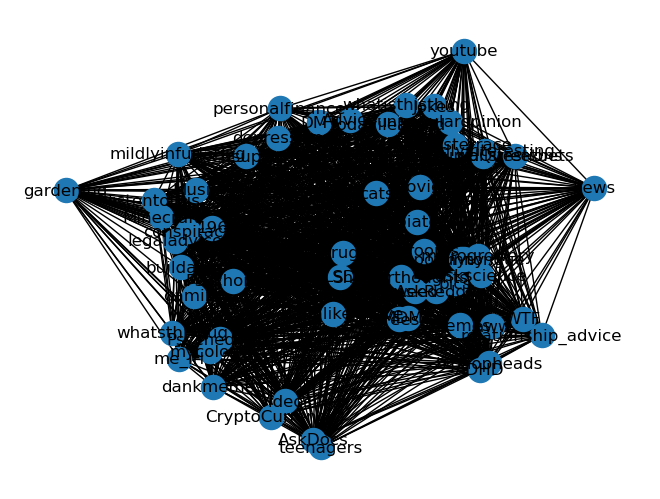

In [27]:
# plot graph
nx.draw(G_trim2, with_labels=True)
plt.show()